# 4.1. 데이터에서 학습한다

## 학습

> **학습**이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다

## 지표

> **손실함수** 신경망이 학습할 수 있도록 해주는 함수.

## 신경망의 주유 특징
---
- end-to-end machine learning : 사람의 개입 없이 처음 부터 끝까지 feature들을 선택하고(일반 머신러닝과는 다르게) 최적값을 알아서 찾는 기술을 갖고 있다.
</br>
</br>

## 범용 능력
---
- being able to apply to new data and predict its value
- prevent overfitting; training and test(validation) data separation

# 4.2. 손실  함수 

### 4.2.1 오차제곱합 (sum of squared errors)

In [1]:
import numpy as np

In [2]:
y = np.array([0.1,0.05, 0.6, 0.0, 0.05, 0.1, 0.0,0.1,0.0,0.0])
t = np.zeros(y.shape[0])
t[2] = 1

In [3]:
t

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
np.sum(y)

1.0

In [5]:
def sse(y,t):
    return np.sum((y-t) **2) * 0.5

In [6]:
sse(y,t)

0.09750000000000003

In [7]:
# when prediction is set to 7
y = np.array([0.1,0.05, 0.1, 0.0, 0.05, 0.1, 0.0,0.6,0.0,0.0])
t = np.zeros(y.shape[0])
t[2] = 1
sse(y,t)

0.5975

### 4.2.2. 교차 엔트로피 오차(cross entropy error)

> $ Entropy = - \sum{t_k}_k log(y_k)$

In [8]:
import matplotlib.pyplot as plt

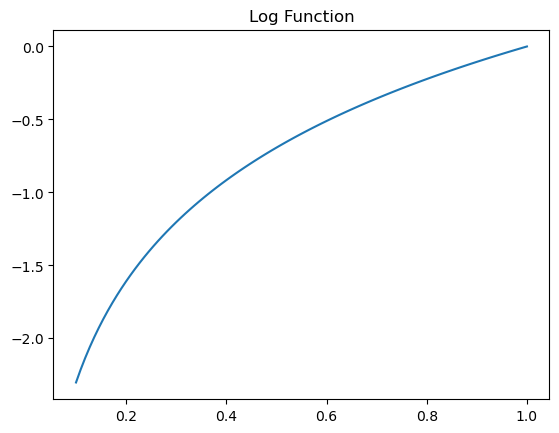

In [9]:
def log_f(x) :
     return  np.log(x)
x = np.linspace(0.1,1,100)
y = log_f(x)

plt.plot(x,y)
plt.title('Log Function')
plt.show()

In [10]:
def cross_entropy_error(y,t) :
    delta= 1e-7
    return -np.sum(t * np.log(y +delta))

In [11]:
y = np.array([0.1,0.05, 0.6, 0.0, 0.05, 0.1, 0.0,0.1,0.0,0.0])
t = np.zeros(y.shape[0])
t[2] = 1
cross_entropy_error(y,t)

0.510825457099338

In [12]:
y = np.array([0.1,0.05, 0.1, 0.0, 0.05, 0.1, 0.0,0.6,0.0,0.0])
t = np.zeros(y.shape[0])
t[2] = 1
cross_entropy_error(y,t)

2.302584092994546

### 4.2.3. 미니배치 학습

> $ E = \frac{1}{N}\sum_n\sum_{k}t_{nk}log(y_{nk}) $

|#|0|1|2|3|4|5|6|7|8|9|
|--|--|--|--|--|--|--|--|--|--|--|
|a|0.1|0.05|0.1|0.0|0.05|0.1|0.0|0.6|0.0|0.0|
|b|0.1|0.05|0.6|0.0|0.05|0.1|0.0|0.1|0.0|0.0|

In [13]:
import sys, os
sys.path.append('../../../deep-learning-from-scratch/')
import numpy as np
from dataset.mnist import load_mnist 

In [14]:
(x_train,y_train),(x_test,y_test) = load_mnist(normalize =True, one_hot_label=True)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(60000, 784) (10000, 784)
(60000, 10) (10000, 10)


In [15]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]
print(x_batch.shape)

(10, 784)


In [16]:
# z = np.arange(0,30).reshape(-1,5)

### 4.2.4. 교차 엔트로피 오차 구현하기

In [17]:
np.dot(y_batch,x_batch).shape

(10, 784)

In [18]:
def cross_entropy_error(y,t) :
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    n = y.shape[0]
    return -np.sum(t* np.log(y+1e-7)) / n

In [19]:
def cross_entropy_error(y,t) :
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    n = y.shape[0]
    return -np.sum(np.log(y[np.arange(t.shape[0],t)+1e-7])) / n

In [20]:
#explained : y[np.arange(t.shape[0],t)+1e-7 
size =10
array_ex = [9,2,3,4,5,6,7,8,9,9]
print(y_batch[0])
y_batch[np.arange(10),np.array([9,2,3,4,5,6,7,8,9,9])]

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
print(y_batch[0:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [22]:
print(y_batch[np.arange(10)])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


### 4.2.5. 왜 손실 함수를 설정하는가?

> 신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다

# 4.3. 수치 미분

### 4.3.1. 미분

> $ \frac{df(x)}{dx} = lim_{h \rightarrow 0}\frac{f(x+h)-f(x)}{h}$

In [23]:
def numerical_dif(f,x) :
    return (f(x + 1e-7) - f(x)) / 1e-7

In [24]:
def sigmoid(x) :
    return (np.exp(1)**x)/(1+ (np.exp(1)**x))

In [25]:
x = np.linspace(-10,10,100)

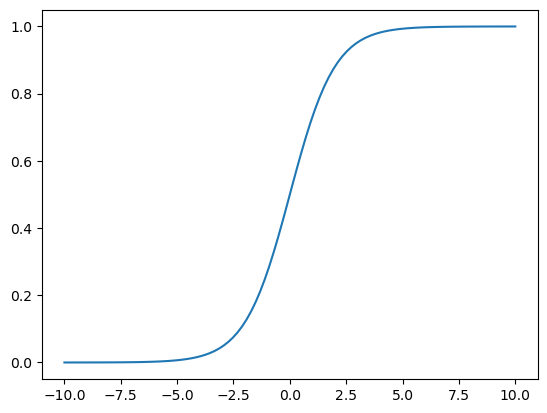

In [26]:
y = sigmoid(x)
plt.plot(x,y)

In [27]:
def tangent_line(f, x):
    d = numerical_dif(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

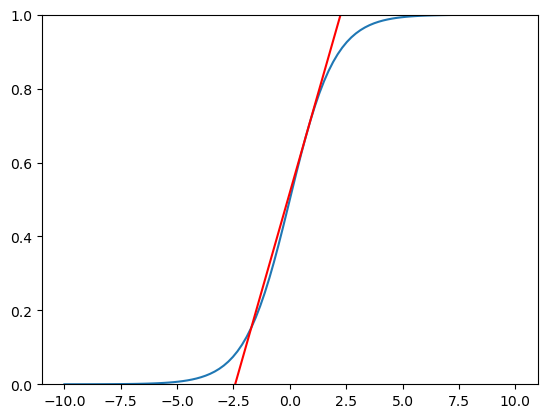

In [28]:
x = np.linspace(-10,10,100)
y = sigmoid(x)
z = tangent_line(sigmoid,0.8)
y2 = z(x)

plt.plot(x,y)
plt.plot(x,y2,color='red')
plt.ylim(0,1)
plt.show()

### 4.3.3. 편미분

> $ f(x_0 x_1)=x_0^2+x_1^2 $

문제 1 :$x_0 =3, x_1 = 4$ 일 때, $x_0$ 에 대한 편미분 $\frac{\delta f}{\delta x_0}$ 를 구하라


In [59]:
def function1(x):
    return x[0]**2 + x[1]**2

In [39]:
def function_temp1(x0):
    return x0**2 + 4**2

In [41]:
numerical_dif(function_temp1,3)

6.0000000701165845

In [42]:
numerical_dif(function1,4)

8.00000009348878

In [49]:
x0 = np.arange(-3,3,0.1)
x1 = np.arange(-3,3,0.1)
X0,X1 = np.meshgrid(x0,x1)
y = function1(X0,X1)
print(y.shape)

(60, 60)


In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [33]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Plot a basic wireframe.
ax.plot_surface(X0,X1,y)
ax.plot(X0,X1,)
plt.show()

#  4.4. 기울기 
---
> **기울기(gradient)**:
> 모든 변수의 편미분을 택터로 정리한 것을 기울기라고 합니다. 

In [118]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad

In [111]:
def numerical_gradient_batch(f,X) :
    if X.ndim == 1:
        return numerical_gradient(f, X)
    
    else :
        grad = np.zeros_like(X)
    
    for i, x in enumerate(X) :
        grad[i] = numerical_gradient(f,x)
    
    return grad

In [116]:
numerical_gradient_batch(function1, np.array([3.0,4.0]))

array([6., 8.])

In [113]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [140]:
a = np.arange(0,4).reshape(-1,2)
b = np.arange(4,8).reshape(-1,2)
np.array([a.flatten(),b.flatten()]).T

array([[0, 4],
       [1, 5],
       [2, 6],
       [3, 7]])

In [145]:
# batch gradient
x0 = np.arange(-3,3,0.25)
x1 = np.arange(-3,3,0.25)
X0,X1 = np.meshgrid(x0,x1)
X0,X1 = X0.flatten(),X1.flatten()
y = numerical_gradient_batch(function_2, np.array([X0,X1]).T).T

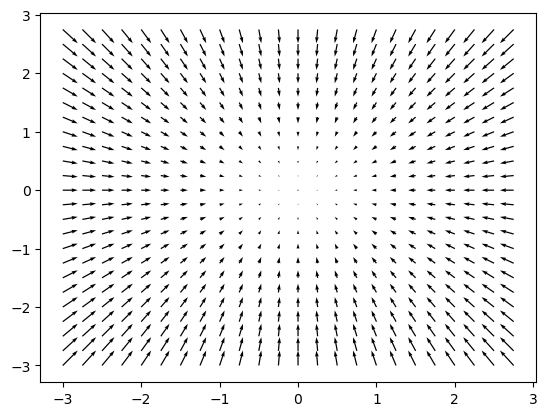

In [151]:
# plot gradient direction
plt.quiver(X0,X1, -y[0], -y[1])
plt.show()

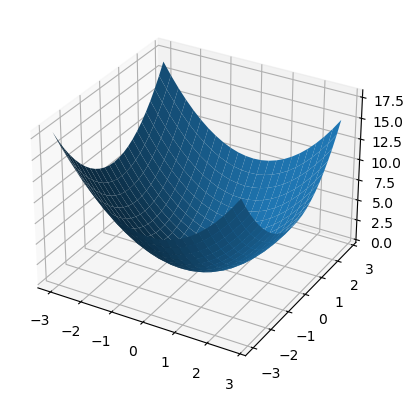

In [185]:
x0 = np.arange(-3,3,0.25)
x1 = np.arange(-3,3,0.25)
X0,X1 = np.meshgrid(x0,x1)
y = X0**2 + X1**2

ax = plt.axes(projection='3d')
ax.plot_surface(X0,X1,y)
plt.show()

### 4.4.1. 경사법(경사 하강법)

$ f(x_0 x_1)=x_0^2+x_1^2 $

> 위 $\uparrow$ 함수의 경사하강법 : </br>
> $ x_{0 new} = x_{0 old} - n\frac{\delta f}{\delta x_0} $ </br>
> $ x_{1 new} = x_{1 old} - n\frac{\delta f}{\delta x_1} $ </br>

In [186]:
#code 구현

def gradient_descent(f, init_x, lr=0.01, step_num =100) :
    x = init_x
    
    for i in range(step_num) :
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x

In [187]:
def function_2(x) :
    return np.sum(x**2)

init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x)

array([-0.39785867,  0.53047822])

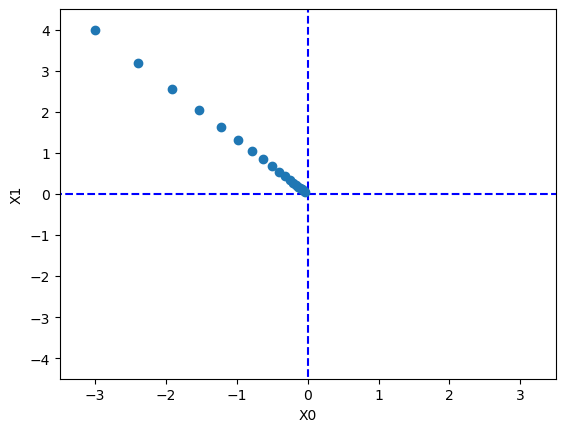

In [188]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 4.4.2. 신경망에서의 기울기

> 여기서 말하는 기울기는 **가중치** 매개변수에 대한 손실 함수의 기울기입니다. 

 $$ W = \begin{pmatrix} w_{11} & w_{12} & w_{13}\\\ w_{21} & w_{22} & w_{23} \end{pmatrix} $$
 
  $$ \frac{\delta L}{\delta W} = \begin{pmatrix} \frac{\delta L}{\delta W_{11}} & \frac{\delta L}{\delta W_{12}} & \frac{\delta L}{\delta W_{13}}\\\ \frac{\delta L}{\delta W_{21}}& \frac{\delta L}{\delta W_{21}} & \frac{\delta L}{\delta W_{23}} \end{pmatrix} $$

In [191]:
#code 구현

import sys, os
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [192]:
# simplenet 신경망 구현
class simplenet:
    def __init__(self) :
        self.W = np.random.rand(2,3)
    
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self, x, t) :
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [196]:
net = simplenet()
print(net.W)
x = np.array([0.6,0.9])

[[0.4174092  0.98509266 0.59917674]
 [0.32914386 0.15984817 0.92434321]]


In [197]:
p = net.predict(x)

In [199]:
print(p)

[0.54667499 0.73491895 1.19141494]


In [201]:
np.argmax(p)

2

In [202]:
t = np.array([0,0,1])
net.loss(x,t)

0.769319985712871

In [203]:
def f(W) :
    return net.loss(x,t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.14589239  0.17611078 -0.32200317]
 [ 0.21883858  0.26416617 -0.48300476]]


In [204]:
f = lambda w : net.loss(x,t)
dW = numerical_gradient( f, net.W)

In [205]:
dW

array([[ 0.14589239,  0.17611078, -0.32200317],
       [ 0.21883858,  0.26416617, -0.48300476]])

# 4.5. 학습 알고리즘 구현하기

### 4.5.1. 2층 신경망 클래스 구현하기

In [206]:
import sys, os
# sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

In [230]:
class TwoLayerNet :
    def __init__(self, input_size, hidden_size, output_size,
                weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self,x) :
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)
        
        return y
        
    def loss(self, x,t) :
        y = self.predict(x)
        
        return cross_entropy_error(y,t)
    
    def accuracy(self, x, t) :
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y ==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t) :
        loss_W = lambda W:self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W,self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W,self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W,self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W,self.params['b2'])        
        
        return grads

In [231]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size =10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [232]:
x = np.random.rand(100,784)
x.shape

(100, 784)

In [233]:
y = net.predict(x)

In [236]:
# x = np.random.rand(100,784)
# t = np.random.rand(100,10)

# grads = net.numerical_gradient(x,t)

# print(grads['W1'].shape)
# print(grads['b1'].shape)
# print(grads['W2'].shape)
# print(grads['b2'].shape)

### 4.5.2. 미니배치 학습 구현하기

In [244]:
import numpy as np
import sys
sys.path.append('../../../deep-learning-from-scratch/')

from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize =True, one_hot_label=True)

In [245]:
train_loss_list = []

iters_num =1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate =0.1

In [246]:
network = TwoLayerNet(input_size = 784, hidden_size =50, output_size =10)

for i in range(iters_num) :
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1','b1','W2','b2') :
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)        

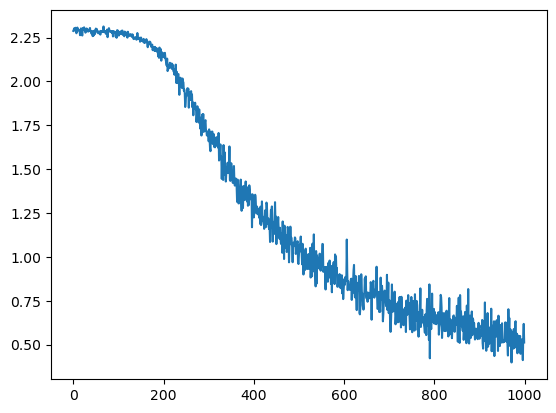

In [248]:
plt.plot(train_loss_list)
plt.show()

## 4.5.3. 시험 데이터로 평가하기

In [250]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

In [252]:
# import dataset
(x_train, t_train) , (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

# create neural network
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# hyperparameter
iters_num = 10000
train_size= x_train.shape[0]
batch_size =100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size,1)

for i in range(iters_num) :
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch =x_train[batch_mask]
    t_batch =t_train[batch_mask]
    
    #slope calc
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1','b1','W2','b2') :
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0 :
        train_acc =network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, testacc |' + str(train_acc) + ',' + str(test_acc))

train acc, testacc |0.08346666666666666,0.0838
train acc, testacc |0.77605,0.785
train acc, testacc |0.8770166666666667,0.8817
train acc, testacc |0.8979666666666667,0.9008
train acc, testacc |0.9064,0.9103
train acc, testacc |0.9128,0.9158
train acc, testacc |0.9188,0.9224
train acc, testacc |0.9234833333333333,0.9242
train acc, testacc |0.9275,0.928
train acc, testacc |0.9306833333333333,0.9306
train acc, testacc |0.9340166666666667,0.9326
train acc, testacc |0.9365333333333333,0.9367
train acc, testacc |0.9382666666666667,0.9383
train acc, testacc |0.9409,0.9408
train acc, testacc |0.9423,0.9415
train acc, testacc |0.9444666666666667,0.9443
train acc, testacc |0.9462666666666667,0.9452


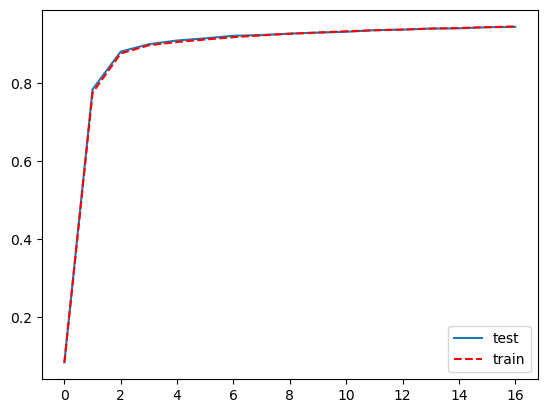

In [264]:
plt.plot(test_acc_list, label='test')
plt.plot(train_acc_list, c ='red',linestyle='--', label ='train')
plt.legend()
plt.show()